<a href="https://colab.research.google.com/github/dvlsatya/Predicting-Alcohol-Consumption-in-studentss/blob/main/ml_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,mean_squared_log_error,r2_score,roc_auc_score

sns.set(style="white", color_codes=True)

In [ ]:
# Loading dataset
df = pd.read_csv('/content/Portuguese (1).csv')


In [ ]:
#Rows tell you the number of obs and columns tell you the number of features
print('Rows and Columns :', df.shape,'\n' ) 

#Running info on the dataset to check on the any visible missing values and datatypes
print('INFO:')
print(df.info(), '\n')

# Checking for the number of unique values in each column in dataset
print('Unique Values :','\n', df.nunique(), '\n')



Rows and Columns : (649, 33) 

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     6

In [ ]:
df.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
0,1,0,18,1,0,0,4,4,2,2,...,4,1,1,3,4,0,11,11,2,0
1,1,0,17,1,0,1,1,1,1,2,...,3,1,1,3,2,9,11,11,2,0
2,1,0,15,1,1,1,1,1,1,2,...,2,2,3,3,6,12,13,12,5,0
3,1,0,15,1,0,1,4,2,1,3,...,2,1,1,5,0,14,14,14,2,0
4,1,0,16,1,0,1,3,3,1,2,...,2,1,2,5,0,11,13,13,3,0


In [ ]:
##CONVERT BINARIES
df=df.replace(['yes','no','M','F','U','R','LE3','GT3','T','A','GP','MS'],[1,0,1,0,1,0,1,0,1,0,1,0])

##DROP CATEGORICAL COLUMNS
###can't use these in a linreg
df=df.drop(['Mjob','Fjob','reason','guardian'],axis=1)


In [ ]:
df.head() ##check conversion; success

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,0,0,4,4,2,2,...,4,3,4,1,1,3,4,0,11,11
1,1,0,17,1,0,1,1,1,1,2,...,5,3,3,1,1,3,2,9,11,11
2,1,0,15,1,1,1,1,1,1,2,...,4,3,2,2,3,3,6,12,13,12
3,1,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,1,0,16,1,0,1,3,3,1,2,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
##PRINT VARIABLES
list(df.columns.values)

#target variables will be Walc & Dalc



['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

Text(0.5, 1.0, 'Gender of students : F - female,M - male')

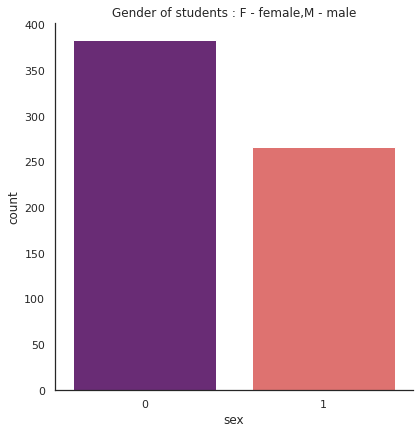

In [ ]:
#Display number of students study Portuguese according to gender.
sns.catplot(x="sex", kind="count",palette="magma", data=df, height = 6)
plt.title("Gender of students : F - female,M - male")

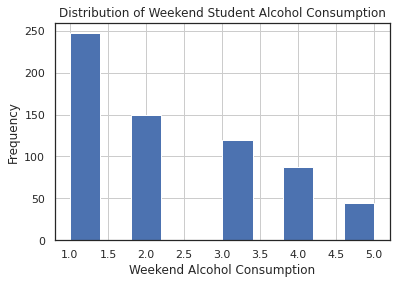

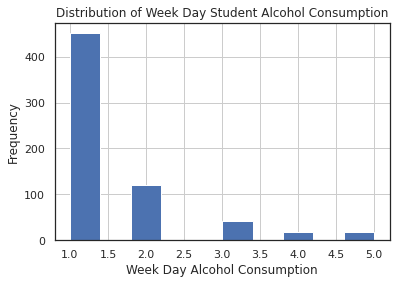

In [ ]:
##EXPLORE DATA - TARGET VAR DISTRIBUTIONS

df.Walc.hist()
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Weekend Student Alcohol Consumption')
plt.show()

#more variability in the Walc target variable, less students drink during the week

df.Dalc.hist()
plt.xlabel('Week Day Alcohol Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Week Day Student Alcohol Consumption')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


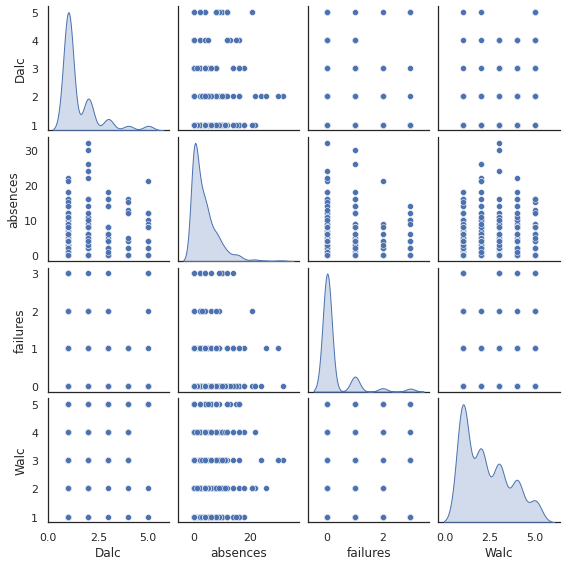

In [ ]:
##LOOK AT VAR EFFECTS ON TARGET

# ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 
#	'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 
#	'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 
#    'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


sns.pairplot(df[['Dalc','absences','failures','Walc']], size=2, diag_kind="kde");

##note: univariate distributions are shown on diagonals
##note: because independent variables are coded some underlying trends are not shown as the frequency of each
###### coded variable cannot be seen on this pairplot

In [ ]:
df['week_alc']= df['Dalc']+df['Walc']

df['week_alc'].value_counts()

2     241
3     116
4      99
5      73
6      50
7      32
8      17
10     15
9       6
Name: week_alc, dtype: int64

0    529
1    120
Name: alc, dtype: int64
0    0.8151
1    0.1849
Name: alc, dtype: float64


Text(0.5, 1.0, 'Distribution of Heavy Drinkers VS Light drinkers')

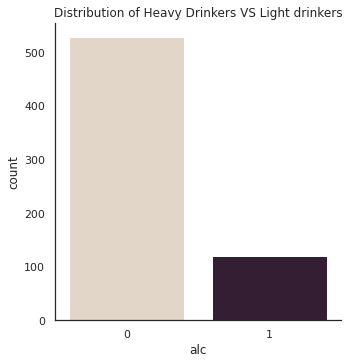

In [ ]:
df['alc'] = [0 if x <= 5 else 1 for x in df['week_alc']]
        
print(df['alc'].value_counts())
print(df['alc'].value_counts(normalize = True))

sns.catplot(x="alc", kind="count", palette="ch:.25", data=df)
plt.title('Distribution of Heavy Drinkers VS Light drinkers')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


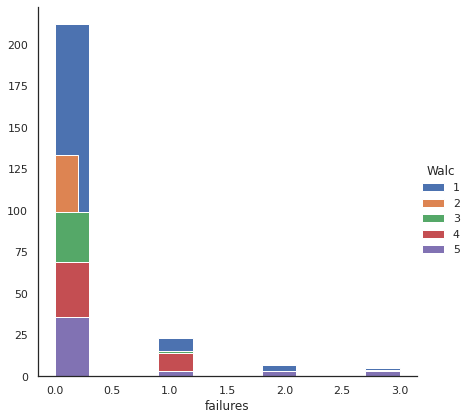

In [ ]:
sns.FacetGrid(df, hue="Walc", size=6).map(plt.hist, "failures").add_legend()

##this plot does a better job of showing the relationship between failures and Walc

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


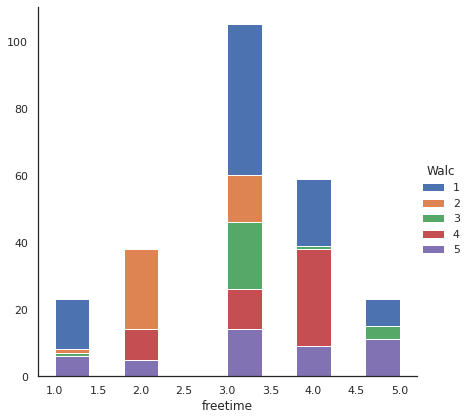

In [ ]:
sns.FacetGrid(df, hue="Walc", size=6).map(plt.hist, "freetime").add_legend()

##higher frequency of high Walc with more free time


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


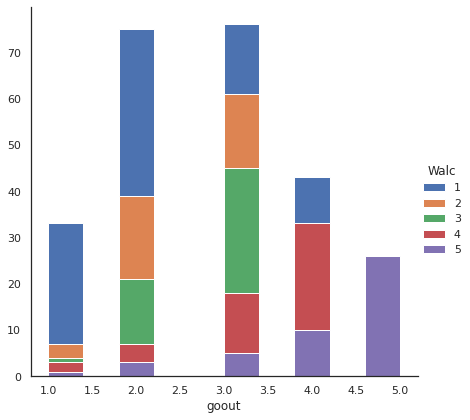

In [ ]:
sns.FacetGrid(df, hue="Walc", size=6).map(plt.hist, "goout").add_legend()

##higher frequency of high Walc the more students go out

In [ ]:
#Alcohol consumption for all day
df['Dalc'] = df['Dalc'] + df['Walc']

In [ ]:
 #We dont we Walc now
df=df.drop(['Walc'],axis=1)

definning dependent variables

In [ ]:
c

dependent variables

In [ ]:
x_train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'health', 'absences', 'G1', 'G2',
       'week_alc', 'alc'],
      dtype='object')

Scaling

In [ ]:
'''#Scaling values
#col=['age','Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','health','absences','G1','G2']
col=[2,6,7,12,13,23,24,25,26,27,28,29,30]
for i in col:
    x_train[i]=x_train[i]/x_train[i].max()
    x_test[i]=x_test[i]/x_test[i].max()'''

"#Scaling values\n#col=['age','Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','health','absences','G1','G2']\ncol=[2,6,7,12,13,23,24,25,26,27,28,29,30]\nfor i in col:\n    x_train[i]=x_train[i]/x_train[i].max()\n    x_test[i]=x_test[i]/x_test[i].max()"

In [ ]:
'''y_train=y_train/y_train.max()
y_test=y_test/y_test.max()  ''' 